<a href="https://colab.research.google.com/github/Gcango/Startup_Unicornio_Analise_Financeira/blob/main/Startups_unicornes_Analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Neste projecto foi objecto de analise diferentes Startups ("Unicórnio") e seus investidores. O termo "Unicórnio" é usado na indústria de capital de risco para descrever uma startup de capital fechado com valor superior a US$ 1 bilhão. As questões e suas respectivas respostas surgem no decorrer no Bloco de notas.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
dados = pd.read_csv("/content/unicorns till sep 2022.csv")

In [3]:
dados.sample(6)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
451,Keep,$2,5/19/2020,China,Beijing,Internet software & services,"Bertelsmann Asia Investments, GGV Capital, Mor..."
910,EcoVadis,$1,6/14/2022,France,Paris,"Supply chain, logistics, & delivery","Astorg Partners, Princeville Global, Beyond Ne..."
1034,Xiaoe Tech,$1,6/15/2021,China,Shenzhen,Internet software & services,"GGV Capital, Hillhouse Capital Management, IDG..."
123,RELEX,$5.70,2/17/2022,Finland,Helsinki,"Supply chain, logistics, & delivery","Blackstone, Technology Crossover Ventures, Sum..."
847,AppDirect,$1.10,10/7/2015,United States,San Francisco,E-commerce & direct-to-consumer,"Mithril, iNovia Capital, Foundry Group"
1174,Remarkable,$1,5/10/2022,Norway,Oslo,Internet software & services,Spark Capital


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1186 non-null   object
 1   Valuation ($B)  1186 non-null   object
 2   Date Joined     1186 non-null   object
 3   Country         1186 non-null   object
 4   City            1186 non-null   object
 5   Industry        1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [5]:
print(f" O dataset possui {dados.shape[0]} linhas e {dados.shape[1]} colunas")

 O dataset possui 1186 linhas e 7 colunas


In [6]:
#Renomeando as colunas do Dataset
dados.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [7]:
dados.rename(columns={
    'Unnamed: 0' : 'Id',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'Pais',
    'City' : 'Cidade',
    'Industry': 'Setor',
    'Select Investors': 'Investidores',
}, inplace=True)

In [9]:
dados.isnull().sum()

Empresa            0
Valor ($)          0
Data de Adesão     0
Pais               0
City               0
Setor              0
Investors         18
dtype: int64

In [ ]:
#Verificando a o impacto do dados nulos Graficamenteno dataset

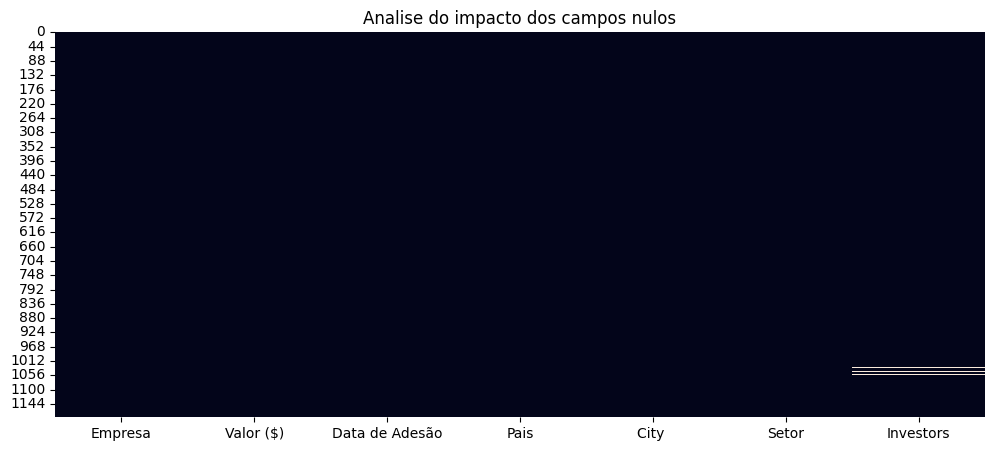

In [11]:
plt.figure(figsize=(12, 5))
plt.title("Analise do impacto dos campos nulos")
sns.heatmap(dados.isnull(), cbar=False);

In [ ]:
#1) - Em termos numericos como podemos perceber a distribuição dos dados deste dataset?

In [14]:
estado = dados.nunique()
print(f"Em termos numericos podemos entender o dataser da seguinte forma: \n{estado}")

Em termos numericos podemos entender o dataser da seguinte forma: 
Empresa           1183
Valor ($)          222
Data de Adesão     695
Pais                48
City               286
Setor               34
Investors         1152
dtype: int64


In [16]:
print(f"A outra forma de podermos enteder o dataset é por meio da descrição:")
dados.describe()

A outra forma de podermos enteder o dataset é por meio da descrição:


,Empresa,Valor ($),Data de Adesão,Pais,City,Setor,Investors
count,1186,1186,1186,1186,1186,1186,1168
unique,1183,222,695,48,286,34,1152
top,Bolt,$1,7/13/2021,United States,San Francisco,Fintech,Sequoia Capital
freq,2,271,9,636,168,239,3


In [ ]:
#2) - Quais sectores as Statups se aplicam mais?

In [20]:
dados['Setor'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [19]:
dados['Setor'].value_counts()

Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

In [ ]:
#3) - Em termos % demostre 12 das areas melhores posicionadas?

In [28]:
graf_sector = dados['Setor'].value_counts(normalize = True).head(12)
print(f"Em termos % as 12 areas com mais bem posiocionadas são: \n{graf_sector.round(2)}")

Em termos % as 12 areas com mais bem posiocionadas são: 
Fintech                                0.20
Internet software & services           0.19
E-commerce & direct-to-consumer        0.09
Health                                 0.08
Artificial intelligence                0.06
Supply chain, logistics, & delivery    0.05
Other                                  0.05
Cybersecurity                          0.05
Data management & analytics            0.04
Auto & transportation                  0.03
Hardware                               0.03
Mobile & telecommunications            0.03
Name: Setor, dtype: float64
